# $k$-Nearest-Neighbors Classifier (KNN)

### Goal of Lesson
- Understand the difference between Classical Computing and Machine Learning
- Know the 3 main categories of Machine Learning
- Dive into Supervised Learning
- Classification with $k$-Nearest-Neighbors Classifier (KNN)
- How to classify data
- What are the challenges with cleaning data
- Create a project on real data with $k$-Nearest-Neighbor Classifier

## What is Machine Learning?

![Machine Learning](img/machine_learning.png)

- In the **classical computing model** every thing is programmed into the algorithms. 
    - This has the limitation that all decision logic need to be understood before usage. 
    - And if things change, we need to modify the program.
- With the **modern computing model (Machine Learning)** this paradigm is changes. 
    - We feed the algorithms (models) with data.
    - Based on that data, the algorithms (models) make decisions in the program.

## How Machine Learning Works

### Phase 1: Learning

![ML Learning](img/ml_process.png)

- **Get Data**: Identify relevant data for the problem you want to solve. This data set should represent the type of data that the Machine Learn model will use to predict from in Phase 2 (predction).
- **Pre-processing**: This step is about cleaning up data. While the Machine Learning is awesome, it cannot figure out what good data looks like. You need to do the cleaning as well as transforming data into a desired format.
- **Train model**: This is where the magic happens, the learning step (Train model). There are three main paradigms in machine learning.
    - **Supervised**: where you tell the algorithm what categories each data item is in. Each data item from the training set is tagged with the right answer.
    - **Unsupervised**: is when the learning algorithm is not told what to do with it and it should make the structure itself.
    - **Reinforcement**: teaches the machine to think for itself based on past action rewards.
- **Test model**: Finally, the testing is done to see if the model is good. The training data was divided into a test set and training set. The test set is used to see if the model can predict from it. If not, a new model might be necessary.

### Phase 2: Prediction

![ML Prediction](img/ml_prediction.png)

 ## Supervised Learning
 - Given a dataset of input-output pairs, learn a function to map inputs to outputs
 - There are different tasks - but we start to focus on **Classification**
 
 
 ### Classification
 - **Supervised learning**: the task of learning a function mapping an input point to a descrete category

### Example
- Predict if it is going to rain or not
- We have historical data to train our model

| Date       | Humidity  | Pressure  | Rain      |
| :--------- |:---------:| ---------:| :---------|
| Jan. 1     | 93%       | 999.7     | Rain      |
| Jan. 2     | 49%       | 1015.5    | No Rain   |
| Jan. 3     | 79%       | 1031.1    | No Rain   |
| Jan. 4     | 65%       | 984.9     | Rain      |
| Jan. 5     | 90%       | 975.2     | Rain      |

- This is supervised learning as it has the label

### The task of Supervised Learning
- Simply explained, the task of from the example above, is to find a funcion $f$ as follows.

**Ideally**: $f(humidity, pressure)$

Examples:
- $f(93, 999.7) =$ Rain
- $f(49, 1015.5) =$ No Rain
- $f(79, 1031.1 =$ No Rain

**Goal**: Approximate the function $f$ - the approximation function is often denoted $h$

Let's start by visualizing it
- Notice that we can do this because it only has two dimensions
- Computers have no problem with higher dimensions.

> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
> - Functionality and concepts used
>     - [**CSV**](https://en.wikipedia.org/wiki/Comma-separated_values) file ([Lecture on CSV](https://youtu.be/LEyojSOg4EI))
>     - [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) read a comma-separated values (csv) file into **pandas** DataFrame.
>     - **List Comprehension** to convert data ([Lecture on **List Comprehension**](https://youtu.be/vCYEvtfXdig))

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('files/weather.csv', parse_dates=True, index_col=0)

In [5]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [6]:
data.index

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3337, freq=None)

In [7]:
dataset = data[['Humidity3pm', 'Pressure3pm', 'RainTomorrow']]

In [8]:
dataset.head()

,Humidity3pm,Pressure3pm,RainTomorrow
Date,,,
2008-02-01,84.0,1017.4,Yes
2008-02-02,73.0,1016.4,Yes
2008-02-03,86.0,1015.6,Yes
2008-02-04,90.0,1011.8,Yes
2008-02-05,74.0,1004.8,Yes


<AxesSubplot:xlabel='Humidity3pm', ylabel='Pressure3pm'>

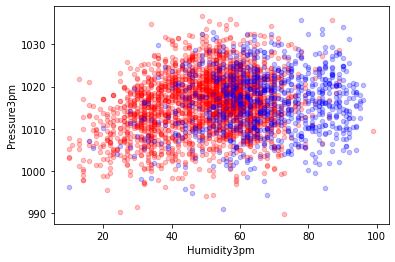

In [11]:
fig, ax = plt.subplots()

dataset[dataset['RainTomorrow'] == 'No'].plot.scatter(x='Humidity3pm', y='Pressure3pm', c='r', alpha=.25, ax=ax)

dataset[dataset['RainTomorrow'] == 'Yes'].plot.scatter(x='Humidity3pm', y='Pressure3pm', c='b', alpha=.25, ax=ax)

### Nearest-Neighbors Classification
- Given an input, choose the class of nearest datapoint

![Nearest-Neighbors Classification](img/nearest_neighbors.png)

### $k$-Nearest-Neighbors Classification
- Given an input, choose the most common class out of the $k$ nearest data points

### Overfitting
- a model that fits too closely to a particular dataset - but fails to predict on future values

### Some approaches
- **Regularization**: penalizing hypothesis that are more complex to favore simpler ones
- [**Holdout Cross-validation**](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Holdout_method): split data into training and testing sets.
- [**$k$-fold Cross validation**](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation): Splitting data into $k$ sets and run $k$ experiments with each set as test set once (using the remaing data as training set)

> #### Programming Notes:
> - Libraries used
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**sklearn**](https://scikit-learn.org/stable/) - tools for predictive data analysis
> - Functionality and concepts used
>     - [**dropna()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) clean the **pandas** DataFrame
>     - **List Comprehension** to convert data ([Lecture on **List Comprehension**](https://youtu.be/vCYEvtfXdig))
>     - [**train_test_split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from [**sklearn**](https://scikit-learn.org/stable/)
>     - [**KNeighborsClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to train (fit) the model
>     - [**metrics.accuracy_score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to get the accuracy of the predictions

In [15]:
dataset_clean = dataset.dropna()
len(dataset), len(dataset_clean)

(3337, 3309)

In [34]:
X = dataset_clean[['Humidity3pm', 'Pressure3pm']]
y = dataset_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [35]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.8091787439613527

In [42]:
sum(y == 0)/len(y)

0.7407071622846781

In [44]:
X_map = np.random.rand(10000, 2)
X_map = X_map*(100, 50) + (0, 990)

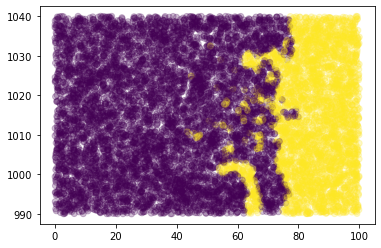

In [53]:
fig, ax = plt.subplots()
y_map = neigh.predict(X_map)
ax.scatter(x=X_map[:,0], y=X_map[:,1], c=y_map, alpha=.25)
# ax.plt.scatter(x = X_map[:,0], y=X_map[:,1])

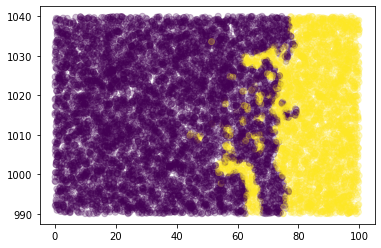

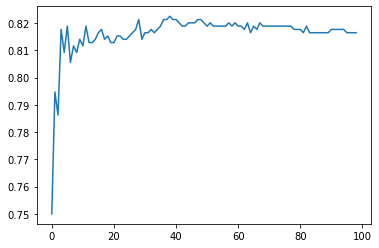